In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

@@@@@@@@@@@@@@@@@@@@@@@@@

return implicit column index by its explicit one.

explicit column index has "get_loc" method which return implicit index:

In [2]:
data = pd.DataFrame([[100, 95, 75, 44],
                   [50, 78, 89, 100],
                   [12, 23, 34, 45]], columns=["bacteria", "archaea", "viruses", "fungi"])

In [3]:
data

,bacteria,archaea,viruses,fungi
0,100,95,75,44
1,50,78,89,100
2,12,23,34,45


@@@@@@@@@@@@@@@@

df to numpy array

In [44]:

data.as_matrix()

array([[100,  12],
       [ 95,  23],
       [ 44,  45]])

@@@@@@@@@@@@@@@@@@@@@

return the implicit index of the column

In [5]:
data.columns.get_loc("fungi")

3

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

return the index of an element from the Series obj
1. using Index obj
2. but it returns implicit index, or, if your with, explicit, if it corresponds to the implicit


In [59]:
s1 = pd.Series(np.linspace(100, 1000, 10), index=list(range(10)))

In [60]:
pd.Index(s1).get_loc(700)

6

In [61]:
s1

0     100.0
1     200.0
2     300.0
3     400.0
4     500.0
5     600.0
6     700.0
7     800.0
8     900.0
9    1000.0
dtype: float64

@@@@@@@@@@@@@@@@@

to return the implicit use the following

In [62]:
s1 = pd.Series(np.linspace(100, 1000, 10), index=["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"])

In [63]:
s1[s1 == 1000].index

Index(['j'], dtype='object')

In [65]:
# or immediately create a simple obj: first el of a list return by tolist()

s1[s1 == 1000].index.tolist()[0]  

'j'

In [66]:
# but if your Series obj may have more than one value you are looking for, don't specify tolist()[0]

s1 = pd.Series([1, 2, 3, 1, 2, 3, 4, 5, 6, 7], index=["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"])

In [68]:
# return all the entries were values == 1000
# than take their indices 
# and convert them to list

s1[s1 == 3].index.tolist()

['c', 'f']

@@@@@@@@@@@@@@@@@@@@@

rename the columns:

In [6]:
d = {"bacteria":"kingdom_1", "archaea":"kingdom_2", "viruses":"kingdom_3", "fungi":"kingdom_4" }

In [7]:
data.rename(columns={key:value for (key,value) in d.items()}, inplace=True)

In [8]:
data

,kingdom_1,kingdom_2,kingdom_3,kingdom_4
0,100,95,75,44
1,50,78,89,100
2,12,23,34,45


@@@@@@@@@@@@@@@@

rename indices

In [9]:
data.rename(index={0:"row_1", 1:"row_2", 2:"row_3"}, inplace=True)

In [10]:
data

,kingdom_1,kingdom_2,kingdom_3,kingdom_4
row_1,100,95,75,44
row_2,50,78,89,100
row_3,12,23,34,45


@@@@@@@@@@@@@

transpose the dataframe

In [11]:
data = data.T

In [12]:
data

,row_1,row_2,row_3
kingdom_1,100,50,12
kingdom_2,95,78,23
kingdom_3,75,89,34
kingdom_4,44,100,45


@@@@@@@@@@@@@@@@@@

delete the row or the column

mind the list!


axis=1 is vertical - it's a column

In [13]:
data.drop(["kingdom_3"], axis=0, inplace=True)

In [14]:
data

,row_1,row_2,row_3
kingdom_1,100,50,12
kingdom_2,95,78,23
kingdom_4,44,100,45


In [15]:
data.drop(["row_2"], axis=1, inplace=True)

In [16]:
data

,row_1,row_3
kingdom_1,100,12
kingdom_2,95,23
kingdom_4,44,45


@@@@@@@@@@@@@@@@@

make a list from a row or a column

In [17]:
data.loc["kingdom_1"].tolist()

[100, 12]

In [18]:
data.loc[:,"row_1"].tolist()

[100, 95, 44]

@@@@@@@@@@@@@@@@@@@@@

applying function to a series obj

f.e. converting column to a log scale

In [19]:
data_ser = pd.Series([0., 1, 2, 4, 8, 16, 32, 64])

In [20]:
a = data_ser.apply(np.log2)

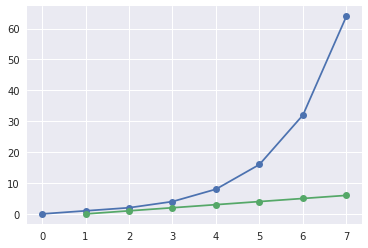

In [21]:
fig_lin_and_log = plt.figure()
plt.plot(list(range(len(data_ser))), data_ser, marker="o")
plt.plot(list(range(len(a))), a, marker="o")

plt.show()

In [22]:
df1 = pd.DataFrame([[1,2,3,4,5],
                   [6,7,8,9,10]])
df1

,0,1,2,3,4
0,1,2,3,4,5
1,6,7,8,9,10


In [23]:
df1.apply(lambda x: x * 100)

,0,1,2,3,4
0,100,200,300,400,500
1,600,700,800,900,1000


@@@@@@@@@@@@@@@@@@@

filling missing values
1. method df.fillna()
2. you can use parameter inplace=True

In [24]:
df_nan = pd.DataFrame([[100, np.nan, 0.2, np.nan],
                      [150, np.nan, 0.7, np.nan],
                      [99, np.nan, 0.8, np.nan]])

In [25]:
df_nan

,0,1,2,3
0,100,NaN,0.2,NaN
1,150,NaN,0.7,NaN
2,99,NaN,0.8,NaN


In [26]:
df_nan.fillna(0)

,0,1,2,3
0,100,0.0,0.2,0.0
1,150,0.0,0.7,0.0
2,99,0.0,0.8,0.0


@@@@@@@@@@@@@@@@@@@@@@@

normalize data
1. import preprocessing
2. use scale function - the easiest way
3. to save 0 in your data, and get values between 0-1, use MinMaxScaler obj 

In [27]:
from sklearn import preprocessing

In [28]:
data_raw = pd.DataFrame([[1, 25, 1500],
                        [0.5, 29, 1200],
                       [0.8, 77, 1000],
                       [0.1, 150, 1987]])

In [29]:
data_raw

,0,1,2
0,1.0,25,1500
1,0.5,29,1200
2,0.8,77,1000
3,0.1,150,1987


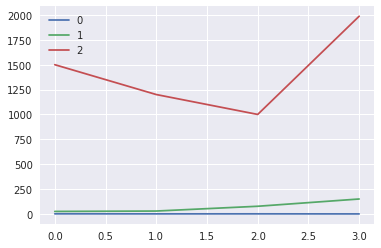

In [30]:
data_raw.plot()
plt.show()

In [31]:
data_scaled = pd.DataFrame(preprocessing.scale(data_raw))

In [32]:
data_scaled

,0,1,2
0,1.179536,-0.898078,0.210513
1,-0.294884,-0.818690,-0.596565
2,0.589768,0.133967,-1.134618
3,-1.474420,1.582800,1.520670


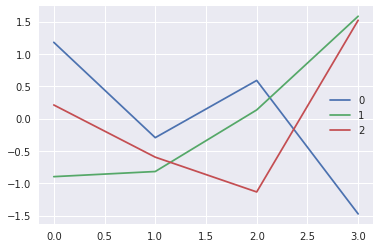

In [33]:
data_scaled.plot()
plt.show()

In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
X_data = pd.DataFrame(min_max_scaler.fit_transform(data_raw))

In [35]:
X_data

,0,1,2
0,1.000000,0.000,0.506586
1,0.444444,0.032,0.202634
2,0.777778,0.416,0.000000
3,0.000000,1.000,1.000000


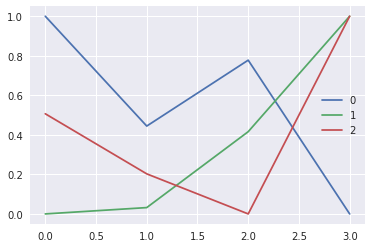

In [36]:
X_data.plot()
plt.show()

@@@@@@@@@@@@@@@@@@@@@@

df from Series objs
1. create series objs
2. make a list of their vars
3. pass the list to the df constructor

so, series' names are going to be the indices

indices are going to be the columns names of the df


In [40]:
# it's better to give a name to a series obj, it saves your time later

ser1 = pd.Series(np.linspace(1, 5, 5), name="data_1", index=list(range(5)))
ser2 = pd.Series(np.linspace(100,1000, 5), name="data_2", index=list(range(5)))
ser3 = pd.Series(np.linspace(-5, 0, 5), name="data_3", index=list(range(5)))

In [41]:
some_series = [ser1, ser2, ser3]

In [42]:
data_123 = pd.DataFrame(some_series)

In [43]:
data_123

,0,1,2,3,4
data_1,1.0,2.00,3.0,4.00,5.0
data_2,100.0,325.00,550.0,775.00,1000.0
data_3,-5.0,-3.75,-2.5,-1.25,0.0


@@@@@@@@@@@@@@@@@@@@@@

mean and standard deviation of a column or a row

In [74]:
data_stat = pd.DataFrame([[1,2,3,4, 5],
                          [10,20,30,40, 50],
                          [100, 200, 300, 400, 500]])

In [75]:
# in columns by default
data_stat.mean()

0     37.0
1     74.0
2    111.0
3    148.0
4    185.0
dtype: float64

In [78]:
# axis=1 (in docs denoted as columns, so it's easy to be confused, as it goes across the rows,
# it's like you squeeze your df in one column
data_stat.mean(axis=1)

0      3.0
1     30.0
2    300.0
dtype: float64